In [41]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [42]:
(x_img_train,y_label_train),(x_img_test,y_label_test) = cifar10.load_data()

In [43]:
print("train data:",'images:',x_img_train.shape," labels:",y_label_train.shape)
print("test  data:",'images:',x_img_test.shape ," labels:",y_label_test.shape)

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [44]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [45]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [47]:
model = Sequential()

In [48]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))

In [49]:
model.add(Dropout(rate=0.3))

In [50]:
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))

In [51]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [52]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))

In [53]:
model.add(Dropout(0.3))

In [54]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))

In [55]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [56]:
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [57]:
model.add(Flatten())
model.add(Dropout(rate=0.3))

In [58]:
model.add(Dense(2500, activation='relu'))
model.add(Dropout(rate=0.3))

In [59]:
model.add(Dense(1500, activation='relu'))
model.add(Dropout(rate=0.3))

In [60]:
model.add(Dense(10, activation='softmax'))

In [61]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [62]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [86]:
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=2, batch_size=128,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 495s 12ms/step - loss: 0.8482 - acc: 0.6980 - val_loss: 0.8104 - val_acc: 0.7163
Epoch 2/2
40000/40000 [==============================] - 490s 12ms/step - loss: 0.7825 - acc: 0.7240 - val_loss: 0.7528 - val_acc: 0.7407


In [64]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

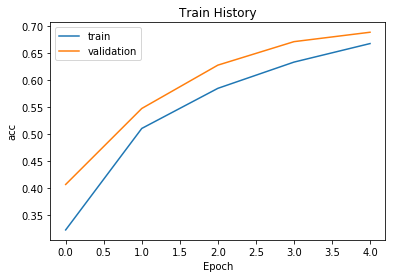

In [65]:
show_train_history(train_history,'acc','val_acc')

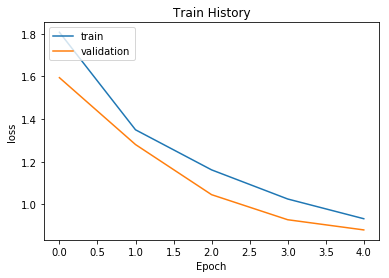

In [66]:
show_train_history(train_history,'loss','val_loss')

In [67]:
scores = model.evaluate(x_img_test_normalize , y_label_test_OneHot, verbose=0)
scores[1]

0.6818

In [68]:
prediction=model.predict_classes(x_img_test_normalize)

In [69]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 2, 3, 1], dtype=int64)

In [70]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [71]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        
        title=str(i)+','+ label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+ label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

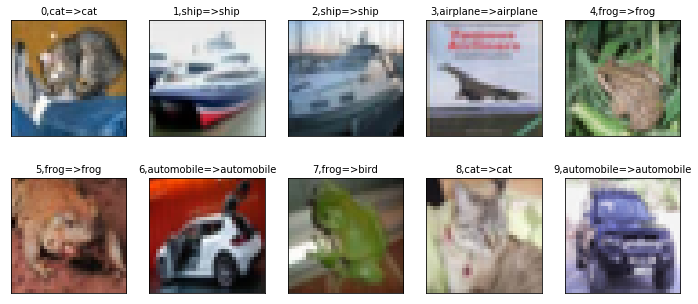

In [72]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0,10)

In [73]:
Predicted_Probability=model.predict(x_img_test_normalize)

In [74]:
def show_Predicted_Probability(y,prediction,x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],'predict',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict cat


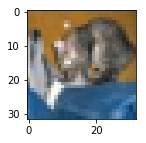

airplane Probability:0.000773080
automobile Probability:0.000901820
bird Probability:0.029474054
cat Probability:0.577444911
deer Probability:0.006739423
dog Probability:0.171953604
frog Probability:0.175413683
horse Probability:0.003205684
ship Probability:0.032587327
truck Probability:0.001506461


In [75]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,0)

label: airplane predict airplane


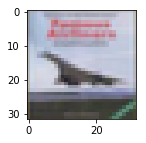

airplane Probability:0.824968815
automobile Probability:0.001470862
bird Probability:0.021606032
cat Probability:0.001117029
deer Probability:0.002487137
dog Probability:0.000071891
frog Probability:0.000356616
horse Probability:0.000083878
ship Probability:0.146509141
truck Probability:0.001328643


In [76]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,3)

In [77]:
prediction.shape

(10000,)

In [78]:
y_label_test.shape

(10000, 1)

In [79]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [80]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,721,12,55,16,11,3,10,8,142,22
1,33,853,4,12,3,1,9,2,37,46
2,69,1,651,60,58,47,69,18,24,3
3,27,6,149,495,50,105,128,16,17,7
4,31,3,172,77,558,26,74,49,10,0
5,13,2,105,240,38,505,57,28,8,4
6,8,3,86,44,40,10,801,0,8,0
7,18,4,66,89,66,56,10,686,0,5
8,81,21,21,12,4,5,12,3,834,7


In [84]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功")
except:
    print("載入模型失敗")

載入模型失敗


In [89]:
model.save_weights("SaveModel/cifarCnnModel.h5")
print("save")

OSError: Unable to create file (unable to open file: name = 'SaveModel/cifarCnnModel.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)